In [3]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_10_Boosting'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_10_Boosting


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [6]:
df = pd.read_excel('Iris.xls')
label_encoder = LabelEncoder()
df['iris'] = label_encoder.fit_transform(df['iris'])
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = df.drop(columns=['iris'])
y = df['iris']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
base_learner = RandomForestClassifier()
model = AdaBoostClassifier(base_estimator=base_learner, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
print('Accuracy train: {:.4f}'.format(model.score(X_train, y_train)))
print('Accuracy test: {:.4f}'.format(model.score(X_test, y_test)))

Accuracy train: 1.0000
Accuracy test: 1.0000


In [20]:
from xgboost import XGBClassifier

In [21]:
model = XGBClassifier()
model.fit(X_train, y_train)
print('Accuracy train: {:.4f}'.format(model.score(X_train, y_train)))
print('Accuracy test: {:.4f}'.format(model.score(X_test, y_test)))

Accuracy train: 1.0000
Accuracy test: 1.0000


In [22]:
model.feature_importances_

array([0.02453703, 0.03816931, 0.6504091 , 0.2868846 ], dtype=float32)

<Figure size 1368x360 with 0 Axes>

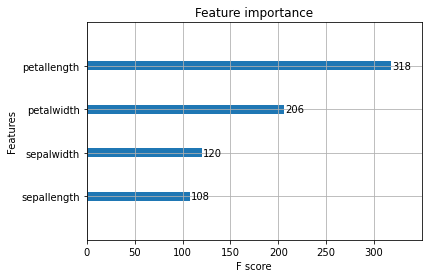

In [29]:
from xgboost import plot_tree, plot_importance
plt.figure(figsize=(19, 5))
plot_importance(model)
plt.show()